In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("/content/Housing (1).csv")

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
binary_cols = [
    'mainroad','guestroom','basement',
    'hotwaterheating','airconditioning','prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})


X = df[['area']]

y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))



R2 Score: 0.2655671959513226


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


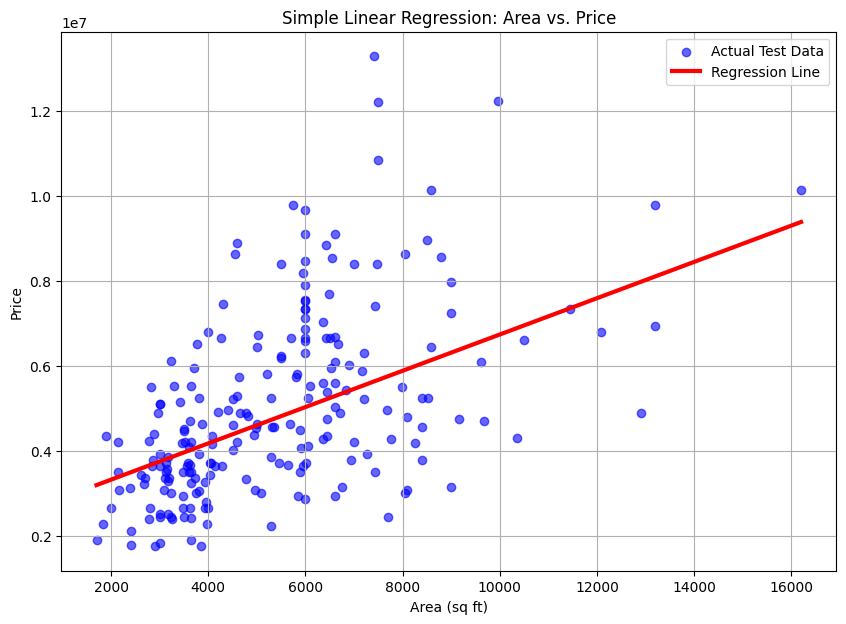

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))

plt.scatter(X_test['area'], y_test, color='blue', label='Actual Test Data', alpha=0.6)


X_range = np.array([X_test['area'].min(), X_test['area'].max()])


y_line = model.predict(X_range.reshape(-1, 1))

plt.plot(X_range, y_line, color='red', linewidth=3, label='Regression Line')

plt.title('Simple Linear Regression: Area vs. Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#pickle

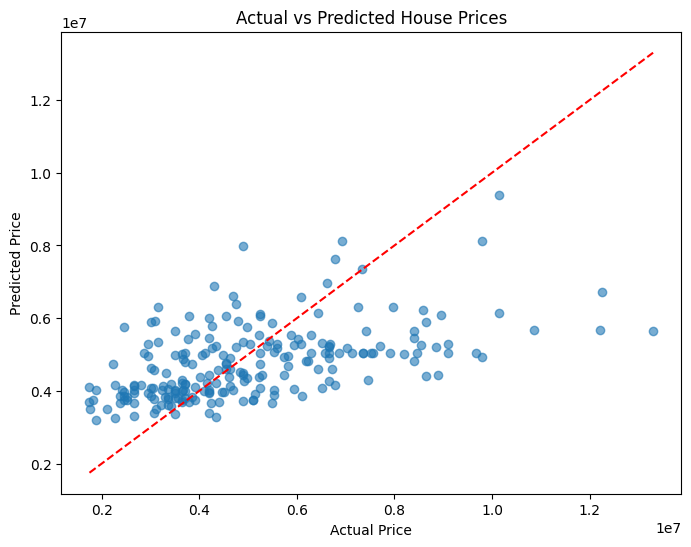